In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
# Filter the dataframe for male entries
plt.style.use('seaborn-whitegrid')

# Load the data
df = pd.read_csv('./walmart_data.csv')
df.columns = [c.lower() for c in df.columns]
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
user_agg_df = df.groupby(['user_id']).agg({
    'product_id': 'count',
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

user_agg_df.head()

,user_id,product_id,purchase,occupation,gender,age,city_category,stay_in_current_city_years,marital_status
0,1000001,35,334093,10,F,0-17,A,2,0
1,1000002,77,810472,16,M,55+,C,4+,0
2,1000003,29,341635,15,M,26-35,A,3,0
3,1000004,14,206468,7,M,46-50,B,2,1
4,1000005,106,821001,20,M,26-35,A,1,1


In [4]:
user_agg_df.groupby(['gender']).purchase.mean()

gender
F    712024.394958
M    925344.402367
Name: purchase, dtype: float64

In [5]:
Y = user_agg_df['purchase']
X = (user_agg_df[['gender']]=='F').astype(int)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     61.69
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           4.75e-15
Time:                        18:37:40   Log-Likelihood:                -89373.
No. Observations:                5891   AIC:                         1.788e+05
Df Residuals:                    5889   BIC:                         1.788e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.253e+05   1.44e+04     64.067      0.0

In [6]:
user_agg_df['CityC'] = (user_agg_df['city_category'] == 'C').astype(int)
user_agg_df['CityB'] = (user_agg_df['city_category'] == 'B').astype(int)
user_agg_df['Female'] = (user_agg_df[['gender']]=='F').astype(int)

In [7]:
Y = user_agg_df['purchase']
X = user_agg_df[['CityC', 'CityB', 'Female']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     360.9
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          3.68e-215
Time:                        18:37:40   Log-Likelihood:                -88907.
No. Observations:                5891   AIC:                         1.778e+05
Df Residuals:                    5887   BIC:                         1.778e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.323e+06   2.78e+04     47.679      0.0

In [8]:
user_agg_df = df.groupby(['user_id']).agg({
    'product_id': 'count',
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

columns = user_agg_df.columns


In [9]:
features = ['gender', 'age']
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

Y = df_encoded['purchase']
X = df_encoded.drop(columns=[c for c in columns if c not in features + ['product_id']]).astype(float) # product_id is th enumber of proudcts
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.749e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:44   Log-Likelihood:                -79947.
No. Observations:                5891   AIC:                         1.599e+05
Df Residuals:                    5882   BIC:                         1.600e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.163e+04   1.34e+04     -1.615      0.1

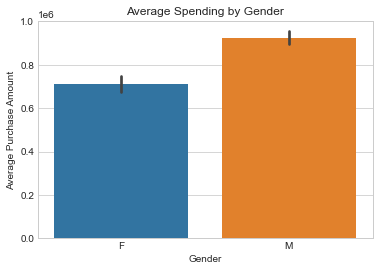

In [10]:
import seaborn as sns

sns.barplot(x=user_agg_df['gender'], y=user_agg_df['purchase'])
plt.xlabel("Gender")
plt.ylabel("Average Purchase Amount")
plt.title("Average Spending by Gender")
plt.show()

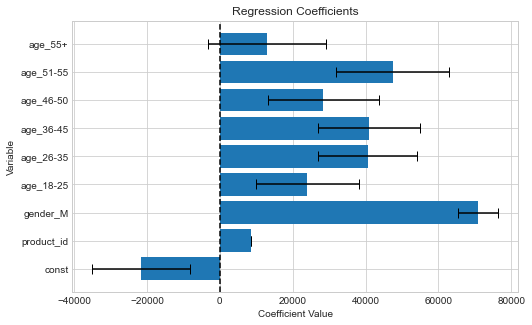

In [11]:
coefs = results.params  # Regression coefficients
errors = results.bse    # Standard errors

plt.figure(figsize=(8, 5))
plt.barh(coefs.index, coefs.values, xerr=errors, capsize=5)
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.title("Regression Coefficients")
plt.axvline(0, color='black', linestyle='--')  # Reference line at 0
plt.show()

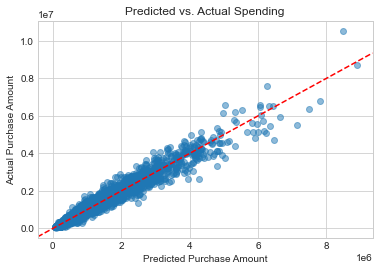

In [12]:
plt.scatter(results.fittedvalues, Y, alpha=0.5)
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Actual Purchase Amount")
plt.title("Predicted vs. Actual Spending")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Ideal fit line
plt.show()


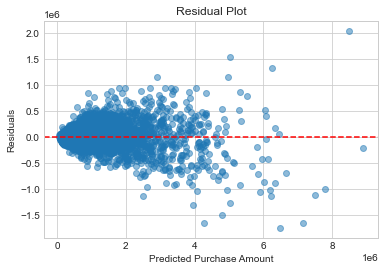

In [13]:
residuals = results.resid
plt.scatter(results.fittedvalues, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [14]:
features = ['gender', 'age', 'city_category', 'stay_in_current_city_years', 'marital_status']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id'])  # Remove target and ID column

# Add intercept
X = sm.add_constant(X)

# Run multiple linear regression
model = sm.OLS(Y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     8771.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:45   Log-Likelihood:                -79936.
No. Observations:                5891   AIC:                         1.599e+05
Df Residuals:                    5874   BIC:                         1.600e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [15]:
features = ['gender', 'age', 'city_category', 'stay_in_current_city_years', 'marital_status']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id'])  # Remove target and ID column

# Add intercept
X = sm.add_constant(X)

weights = 1 / user_agg_df['gender'].map(user_agg_df['gender'].value_counts(normalize=True))  # Inverse frequency weighting
model = sm.WLS(Y, X, weights=weights).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     9085.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:45   Log-Likelihood:                -79892.
No. Observations:                5891   AIC:                         1.598e+05
Df Residuals:                    5874   BIC:                         1.599e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [16]:
features = ['gender', 'age', 'city_category', 'stay_in_current_city_years', 'marital_status']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id'])  # Remove target and ID column

# Add intercept
X = sm.add_constant(X)


model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     8771.
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:45   Log-Likelihood:                -79936.
No. Observations:                5891   AIC:                         1.599e+05
Df Residuals:                    5874   BIC:                         1.600e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [17]:
user_agg_df['log_purchase'] = np.log1p(user_agg_df['purchase'])

Y = user_agg_df['log_purchase']
model = sm.WLS(Y, X, weights=weights).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:           log_purchase   R-squared:                       0.704
Model:                            WLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     871.9
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:45   Log-Likelihood:                -4999.1
No. Observations:                5891   AIC:                         1.003e+04
Df Residuals:                    5874   BIC:                         1.015e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

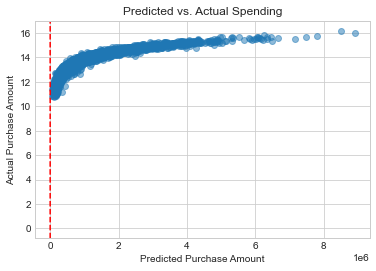

In [18]:
plt.scatter(results.fittedvalues, Y, alpha=0.5)
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Actual Purchase Amount")
plt.title("Predicted vs. Actual Spending")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Ideal fit line
plt.show()

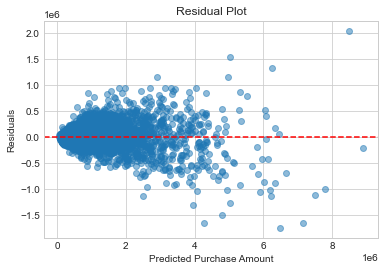

In [19]:
residuals = results.resid
plt.scatter(results.fittedvalues, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Purchase Amount")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [20]:
user_agg_df = df.groupby(['user_id']).agg({
    'product_id': 'count',
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

# Create dummy variables for categorical columns
features = ['gender', 'age', 'city_category']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id', 'stay_in_current_city_years', 'marital_status'])

# Add constant (intercept)
X = sm.add_constant(X)

# Drop columns with high p-values
X = X.drop(['occupation', 'age_18-25', 'age_46-50', 'age_55+'], axis=1)

# Calculate weights using inverse frequency of gender
weights = 1 / user_agg_df['gender'].map(user_agg_df['gender'].value_counts(normalize=True))

# Fit the weighted least squares model
model = sm.WLS(Y, X, weights=weights).fit()

# Print model summary
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 2.076e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:37:48   Log-Likelihood:                -79896.
No. Observations:                5891   AIC:                         1.598e+05
Df Residuals:                    5883   BIC:                         1.599e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9944.5188   7413.207     

In [ ]:
user_agg_df = df.groupby(['user_id']).agg({
    'product_id': 'count',
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

# Create dummy variables for categorical columns
features = ['gender', 'age', 'city_category']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id', 'stay_in_current_city_years', 'marital_status'])

# Add constant (intercept)
X = sm.add_constant(X)

# Drop columns with high p-values
X = X.drop(['occupation', 'age_18-25', 'age_46-50', 'age_55+'], axis=1)

# Calculate weights using inverse frequency of gender
weights = 1 / user_agg_df['gender'].map(user_agg_df['gender'].value_counts(normalize=True))

# Fit the weighted least squares model
model = sm.WLS(Y, X, weights=weights).fit()

# Print model summary
print(model.summary())

In [45]:
user_agg_df = df.groupby(['user_id', 'product_id']).agg({
    'product_id': 'count', # need to replace this by counting something else
    'purchase': 'sum',
    'occupation': 'min',
    'gender': 'min',
    'age': 'min',
    'city_category': 'min',
    'stay_in_current_city_years': 'min',
    'marital_status': 'min',
}).reset_index()

# Create dummy variables for categorical columns
features = ['gender', 'age', 'city_category', 'marital_status']

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(user_agg_df, columns=features, drop_first=True)
df_encoded['marriage_gender'] = df_encoded['marital_status_1'] * df_encoded['gender_M']

# Define dependent (Y) and independent variables (X)
Y = df_encoded['purchase']
X = df_encoded.drop(columns=['purchase', 'user_id', 'stay_in_current_city_years'])

# Add constant (intercept)
X = sm.add_constant(X)

# Drop columns with high p-values
X = X.drop(['occupation', 'age_18-25', 'age_46-50', 'age_55+'], axis=1)

# Calculate weights using inverse frequency of gender
weights = 1 / user_agg_df['gender'].map(user_agg_df['gender'].value_counts(normalize=True))

# Fit the weighted least squares model
model = sm.WLS(Y, X, weights=weights).fit()

# Print model summary
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.961
Model:                            WLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.615e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        18:57:44   Log-Likelihood:                -79894.
No. Observations:                5891   AIC:                         1.598e+05
Df Residuals:                    5881   BIC:                         1.599e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.333e+04   7853.074  

In [44]:
df_encoded

,user_id,product_id,purchase,occupation,stay_in_current_city_years,gender_M,age_18-25,age_26-35,age_36-45,age_46-50,age_51-55,age_55+,city_category_B,city_category_C,marital_status_1
0,1000001,35,334093,10,2,0,0,0,0,0,0,0,0,0,0
1,1000002,77,810472,16,4+,1,0,0,0,0,0,1,0,1,0
2,1000003,29,341635,15,3,1,0,1,0,0,0,0,0,0,0
3,1000004,14,206468,7,2,1,0,0,0,1,0,0,1,0,1
4,1000005,106,821001,20,1,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,1006036,514,4116058,15,4+,0,0,1,0,0,0,0,1,0,1
5887,1006037,122,1119538,1,4+,0,0,0,0,1,0,0,0,1,0
5888,1006038,12,90034,1,2,0,0,0,0,0,0,1,0,1,0
5889,1006039,74,590319,0,4+,0,0,0,0,1,0,0,1,0,1


In [23]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your independent variables (after adding the constant)
X = sm.add_constant(X)  # Add constant if not already included

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF data
print(vif_data)

           feature        VIF
0            const  11.584072
1       product_id   1.189569
2         gender_M   1.007658
3        age_26-35   1.281906
4        age_36-45   1.231191
5        age_51-55   1.120272
6  city_category_B   1.874718
7  city_category_C   2.080808


In [24]:
from scipy.stats import chi2_contingency

# Example: Testing independence between gender and purchase (categorizing purchase into "high" and "low")
df['purchase_category'] = df['purchase'].apply(lambda x: 'high' if x > df['purchase'].median() else 'low')

# Create contingency table
contingency_table = pd.crosstab(df['gender'], df['purchase_category'])

# Perform Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

KeyboardInterrupt: 